<a href="https://colab.research.google.com/github/thamonS/python_dataviz2024/blob/main/HW8_stacked_and_grouped_bar_chart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Data

In [3]:
import pandas as pd
import os

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
path = '/content/drive/MyDrive/Data_viz_2024_data'

In [6]:
movie_india = pd.read_csv(os.path.join(path,'IMDb_Movies_India.csv'), encoding='latin-1')
movie_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [7]:
movie_india['Year'] = movie_india['Year'].str.replace('(', '').str.replace(')', '')
movie_india['Duration'] = movie_india['Duration'].str.replace('min', '')
movie_india.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010,105,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Stacked bar chart

In [8]:
def split_genres(row):
  # Check if the genre value is a string before splitting
  if isinstance(row['Genre'], str):
    genres = row['Genre'].split(',')
    return [genre.strip() for genre in genres]
  else:
    # Handle cases where the genre is not a string (e.g., return an empty list or NaN)
    return []

movie_india['Genre'] = movie_india.apply(split_genres, axis=1)

In [9]:
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import drive
import os

# Function to split genres and create new rows
def split_genres(row):
  if isinstance(row['Genre'], list):
    new_rows = []
    for i in range(len(row['Genre'])):
      new_row = row.copy()
      new_row['Genre'] = row['Genre'][i]
      new_rows.append(new_row)
    return new_rows
  else:
    return [row]

# Apply the function to split genres and create new rows
new_md = pd.concat([pd.DataFrame(split_genres(row)) for _, row in movie_india.iterrows()], ignore_index=True)

In [10]:
new_md.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021,90,Drama,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Homecoming,2021,90,Musical,NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor


In [11]:
new_md = new_md.dropna(subset=['Rating','Year'])

In [12]:
new_md['Genre'].value_counts()

,count
Genre,
Drama,4924
Action,2358
Romance,1781
Comedy,1609
Crime,1111
Thriller,876
Family,663
Musical,498
Adventure,386


In [13]:
# Filter the DataFrame to include only the specified genres
selected_genres = ['Drama', 'Action', 'Romance', 'Comedy', 'Crime']
filtered_data = new_md[new_md['Genre'].isin(selected_genres)]


In [14]:
filtered_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
7,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
8,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
...,...,...,...,...,...,...,...,...,...,...
23066,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand
23067,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23068,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani
23071,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja


In [15]:
# Define a function to categorize years
def categorize_year(year):
  if 1917 <= year <= 1951:
    return '1917 - 1951'
  elif 1952 <= year <= 1986:
    return '1952 - 1986'
  else:
    return '1987 - 2021'

# Apply the function to create a new column 'Year Category'
filtered_data['Year Category'] = pd.to_numeric(filtered_data['Year']).apply(categorize_year)

<ipython-input-15-6772a44df8f9>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Year Category'] = pd.to_numeric(filtered_data['Year']).apply(categorize_year)


In [16]:
filtered_data

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Year Category
1,#Gadhvi (He thought he was Gandhi),2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,1987 - 2021
4,#Yaaram,2019,110,Comedy,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1987 - 2021
5,#Yaaram,2019,110,Romance,4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,1987 - 2021
7,...Aur Pyaar Ho Gaya,1997,147,Comedy,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1987 - 2021
8,...Aur Pyaar Ho Gaya,1997,147,Drama,4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,1987 - 2021
...,...,...,...,...,...,...,...,...,...,...,...
23066,Zulm Ko Jala Doonga,1988,NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah,Sumeet Saigal,Suparna Anand,1987 - 2021
23067,Zulmi,1999,129,Action,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1987 - 2021
23068,Zulmi,1999,129,Drama,4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,1987 - 2021
23071,Zulm-O-Sitam,1998,130,Action,6.2,20,K.C. Bokadia,Dharmendra,Jaya Prada,Arjun Sarja,1987 - 2021


In [17]:
group_data = filtered_data.groupby(['Genre','Year Category'])['Genre'].count().unstack()
group_data

Year Category,1917 - 1951,1952 - 1986,1987 - 2021
Genre,,,
Action,10,702,1646
Comedy,12,396,1201
Crime,5,292,814
Drama,171,1654,3099
Romance,61,650,1070


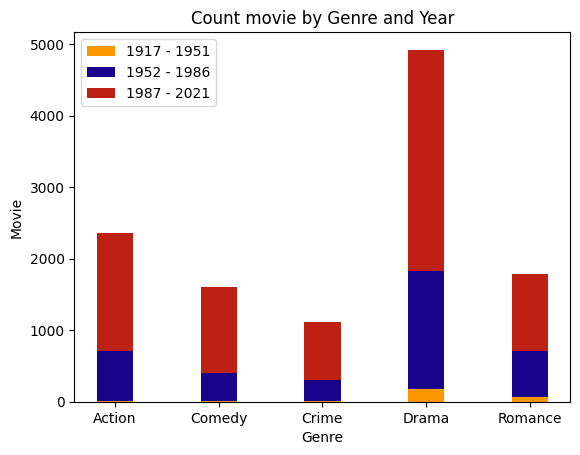

In [18]:
import matplotlib.pyplot as plt

width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(group_data.index, group_data['1917 - 1951'].values, width,
       label='1917 - 1951',color = '#fc9700')
ax.bar(group_data.index, group_data['1952 - 1986'].values, width,
       bottom=group_data['1917 - 1951'].values,
       label = '1952 - 1986',color = '#19038a')
ax.bar(group_data.index, group_data['1987 - 2021'].values, width,
       bottom=group_data['1917 - 1951'].values+group_data['1952 - 1986'].values,
       label = '1987 - 2021',color = '#be2111')
ax.set_ylabel('Movie')
ax.set_xlabel('Genre')
ax.set_title('Count movie by Genre and Year')
ax.legend()

plt.show()


#Grouped bar chart

In [19]:
# Define a function to categorize duration
def categorize_duration(duration):
  if duration < 90:
    return 'short'
  elif 90 <= duration <= 150:
    return 'medium'
  else:
    return 'high'

# Apply the function to create a new column 'Duration Category'
filtered_data['Duration Category'] = pd.to_numeric(
    filtered_data['Duration']).apply(categorize_duration)

<ipython-input-19-042a94587891>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['Duration Category'] = pd.to_numeric(


In [20]:
group = filtered_data.groupby(
    ['Year Category','Duration Category'])['Duration Category'].count().unstack()
group

Duration Category,high,medium,short
Year Category,,,
1917 - 1951,140,114,5
1952 - 1986,2020,1667,7
1987 - 2021,3031,4555,244


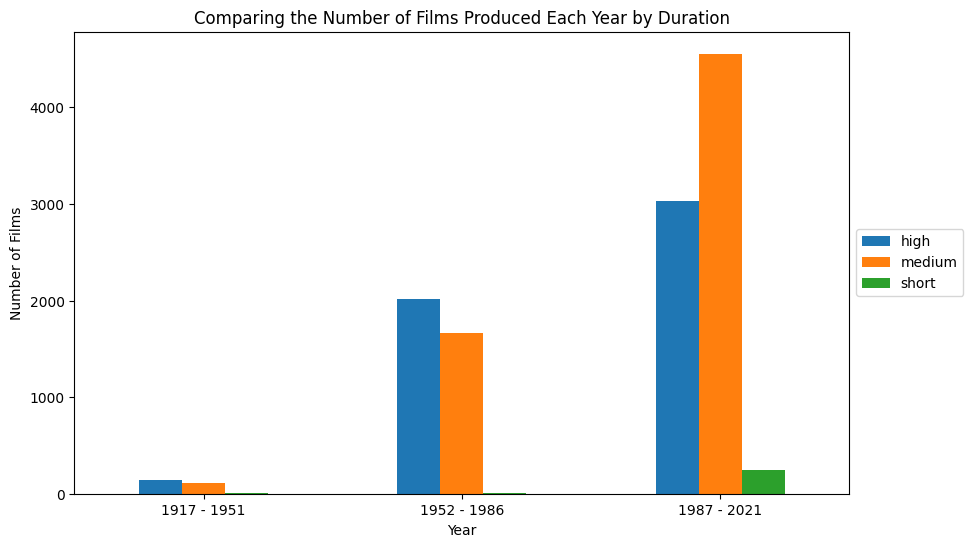

In [21]:
# Create the grouped bar chart
group.plot(kind='bar', figsize=(10, 6))

# Add labels and title
plt.ylabel('Number of Films')
plt.xlabel('Year')
plt.title('Comparing the Number of Films Produced Each Year by Duration')

plt.xticks(rotation=0)

# Move the legend outside the graph
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

# Display the chart
plt.show()